<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/Used_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from google.colab import files
url = 'https://raw.githubusercontent.com/nabilbeit/McGill/main/Toyota_Used_Cars_.csv'
df = pd.read_csv(url)
print(df.head(10))


   Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel   90         1          0  2000      3    1165   
1  13750   23  72937   Diesel   90         1          0  2000      3    1165   
2  13950   24  41711   Diesel   90         1          0  2000      3    1165   
3  14950   26  48000   Diesel   90         0          0  2000      3    1165   
4  13750   30  38500   Diesel   90         0          0  2000      3    1170   
5  12950   32  61000   Diesel   90         0          0  2000      3    1170   
6  16900   27  94612   Diesel   90         1          0  2000      3    1245   
7  18600   30  75889   Diesel   90         1          0  2000      3    1245   
8  21500   27  19700   Petrol  192         0          0  1800      3    1185   
9  12950   23  71138   Diesel   69         0          0  1900      3    1105   

   Mileage  
0    29196  
1    45321  
2    25918  
3    29826  
4    23923  
5    37904  
6    58789  
7    47155  
8 

In [15]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 1198
Number of Columns: 11


In [19]:
category = len(df.select_dtypes(include=['object']).columns)
number = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', category, 'categorical', '+',
      number, 'numerical', '=', category+number, 'features')


Total Features:  1 categorical + 10 numerical = 11 features


In [96]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,11243.260434,52.088481,69221.795492,101.343072,0.678631,0.048414,1576.191987,4.064274,1076.470785,43012.429048,0.014190,0.126043,0.859766
std,3743.745345,17.951960,40363.040114,15.575509,0.467197,0.214729,192.441556,0.956030,55.531205,25080.404751,0.118324,0.332037,0.347374
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000,1.000000,0.000000,0.000000,0.000000
25%,8950.000000,41.000000,39458.250000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000,24518.000000,0.000000,0.000000,1.000000
50%,10250.000000,56.000000,61988.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000,38518.000000,0.000000,0.000000,1.000000
75%,12450.000000,65.000000,93059.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,1100.000000,57824.750000,0.000000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000,150993.000000,1.000000,1.000000,1.000000


In [98]:
df.dtypes

Price              int64
Age                int64
KM                 int64
HP                 int64
MetColor           int64
Automatic          int64
CC                 int64
Doors              int64
Weight             int64
Mileage            int64
FuelType_CNG       uint8
FuelType_Diesel    uint8
FuelType_Petrol    uint8
dtype: object

In [99]:
print(df.isnull().sum())

Price              0
Age                0
KM                 0
HP                 0
MetColor           0
Automatic          0
CC                 0
Doors              0
Weight             0
Mileage            0
FuelType_CNG       0
FuelType_Diesel    0
FuelType_Petrol    0
dtype: int64


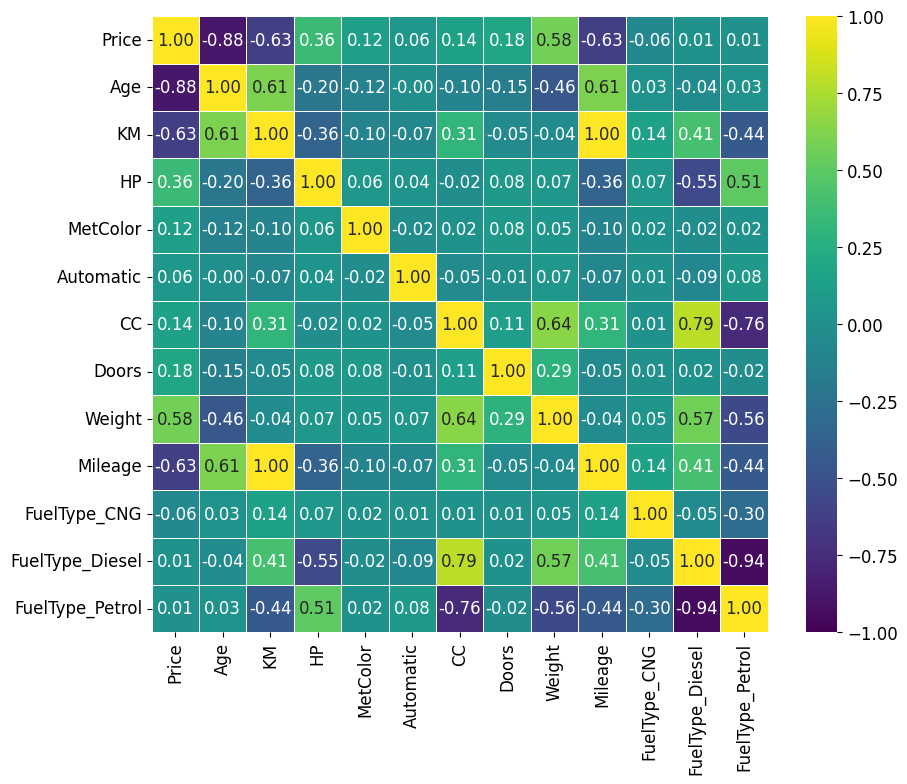

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


In [93]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
dfencoded = df
features = dfencoded.corr()
targetFeature = abs(features["Price"])
relevant_features = targetFeature[targetFeature>0.075]
dfSelected = dfencoded[relevant_features.index]
dfSelected

,Price,Age,KM,HP,MetColor,CC,Doors,Weight,Mileage
0,13500,23,46986,90,1,2000,3,1165,29196
1,13750,23,72937,90,1,2000,3,1165,45321
2,13950,24,41711,90,1,2000,3,1165,25918
3,14950,26,48000,90,0,2000,3,1165,29826
4,13750,30,38500,90,0,2000,3,1170,23923
...,...,...,...,...,...,...,...,...,...
1193,8450,70,89983,110,0,1600,3,1055,55913
1194,7500,78,89953,110,0,1600,5,1114,55894
1195,8750,74,89800,72,1,2000,3,1115,55799
1196,8750,79,89739,86,1,1300,5,1035,55761


In [92]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
dfencoded = df
dfencoded

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,29196,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,45321,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,25918,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,29826,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,23923,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,8450,70,89983,110,0,0,1600,3,1055,55913,0,0,1
1194,7500,78,89953,110,0,0,1600,5,1114,55894,0,0,1
1195,8750,74,89800,72,1,0,2000,3,1115,55799,0,1,0
1196,8750,79,89739,86,1,0,1300,5,1035,55761,0,0,1


In [85]:
# Normalizing the Data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

data = dfSelected.drop(columns=['Price'])
target = dfSelected['Price']
x = StandardScaler().fit_transform(data)
scaledData = pd.DataFrame(x, columns=data.columns)
scaledData['Price'] = target

In [86]:
# Partition the dataset into training and testing sets

x = scaledData.drop(columns=['Price'])
y = scaledData['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [101]:
# Linear Regression Model

lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = lr.score(x_test,y_test)
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error (MSE): {mse}")
print('R Square Score: ', score)
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")


Mean Squared Error (MSE): 2245315.48229347
R Square Score:  0.8629489159590576
Coefficients: [-2.25242487e+03 -8.04534566e+06  5.44039782e+02  1.68702565e+01
 -1.76934157e+02 -3.64633145e+01  1.11479395e+03  8.04467636e+06]
Intercept: 11232.84161738428


In [102]:
!pip install shap

Mean Squared Error (MSE): 2372275.243921879
R Square Score:  0.8299623997655384
Coefficients: [-2.20232150e+03 -7.94386606e+05  5.55969561e+02  5.76607587e+01
 -3.74598033e+02 -3.68050605e+01  1.41739775e+03  7.93783306e+05]
Intercept: 11255.990616647283


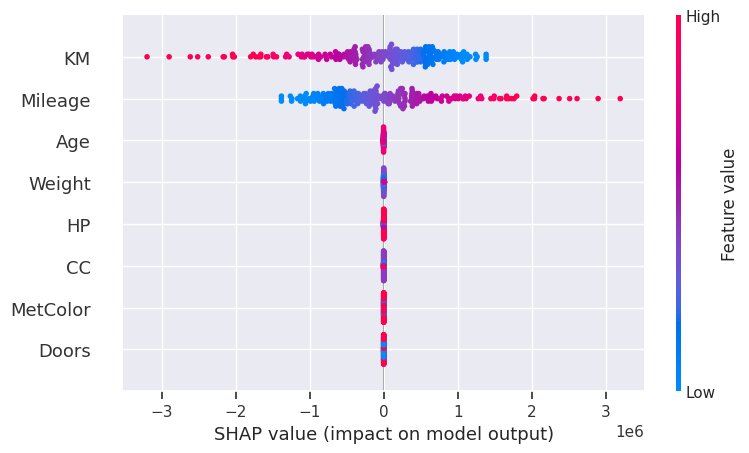

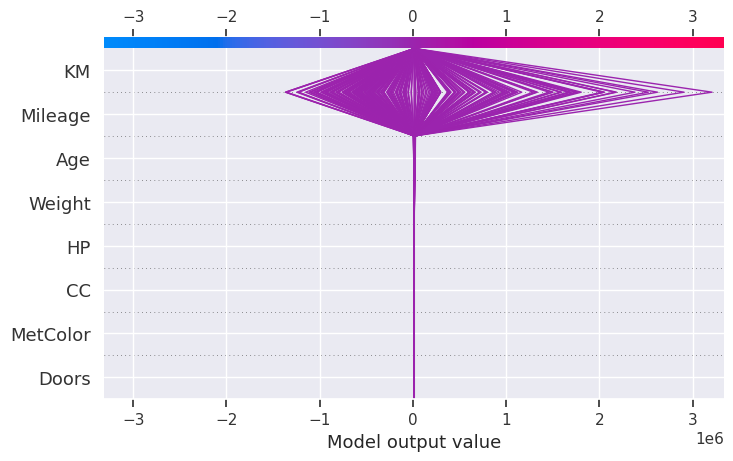

In [ ]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Your existing code
data = dfSelected.drop(columns=['Price'])
target = dfSelected['Price']
x = StandardScaler().fit_transform(data)
scaledData = pd.DataFrame(x, columns=data.columns)
scaledData['Price'] = target
x = scaledData.drop(columns=['Price'])
y = scaledData['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = lr.score(x_test,y_test)
mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error (MSE): {mse}")
print('R Square Score: ', score)
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

# Compute Shapley values
explainer = shap.Explainer(lr, x_train)
shap_values = explainer(x_test)

# Summarize the Shapley values in a plot
shap.summary_plot(shap_values, x_test)

shap.decision_plot(explainer.expected_value, shap_values.values, x_test)

